# Hypothesis Testing with Insurance Data Core


In [1]:
# imports
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats


import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
df = pd.read_csv('Data/insurance-data.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Q1 Hypothesis Testing

## Null Hypothesis & Alternate Hypothesis
Q1.  Do smokers have higher insurance charges than non-smokers?
- H0 (Null Hypothesis): Smokers have the same insurance amount charges as non-smokers.
- H1 (Alternative Hypothesis): Smokers have significantly higher insurance charges than non-smokers.



1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

In [3]:
# separating the column of interest based on the groups in question
non_smoker = df.loc[df['smoker']=="no", ['charges', 'smoker']]
smoker = df.loc[df['smoker']=="yes", ['charges', 'smoker']]
print(f"There are {len(non_smoker)} non-smokers who were charged.")
print(f"There are {len(smoker)} smokers who were charged.")

There are 1064 non-smokers who were charged.
There are 274 smokers who were charged.


> The populations are unevenly distributed.

In [4]:
# separating the data into two groups and now placing them back together for quantity by group in question
plot_df = pd.concat([non_smoker, smoker], axis=0)
plot_df

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no
...,...,...
1313,36397.57600,yes
1314,18765.87545,yes
1321,28101.33305,yes
1323,43896.37630,yes


In [5]:
# save final groups as exam requires
nonsmoker_group =  non_smoker['charges']
smoker_group = smoker['charges']
display(nonsmoker_group.head(), smoker_group.head())

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

# Checking Assumptions of 2-Sample T-test

- Comparing a numeric measurement (charge amount) between non-smokers and smokers. We will run a 2-sample (i.e., Indepedent T-Test).
 - No significant outliers
 - Normality
 - Equal Variance

## Checking for Outliers

In [6]:
# checking for abs value of z-scores that are > 3
is_outlier_nonsmoker = np.abs(stats.zscore(nonsmoker_group)) > 3
print(f"There are {is_outlier_nonsmoker.sum()} outliers in the non-smoker group out of {len(is_outlier_nonsmoker)}.")

There are 24 outliers in the non-smoker group out of 1064.


In [7]:
# removing outliers from the non_smoker df
non_smoker.loc[~is_outlier_nonsmoker]

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no
...,...,...
1332,11411.68500,no
1333,10600.54830,no
1334,2205.98080,no
1335,1629.83350,no


In [8]:
# removing outliers from the group
nonsmoker_group = nonsmoker_group.loc[~is_outlier_nonsmoker]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

In [9]:
# checking for abs value of z-scores that are > 3
is_outlier_smoker = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smoker.sum()} outliers in the smoker group out of {len(is_outlier_smoker)}.")

There are 0 outliers in the smoker group out of 274.


In [10]:
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

# Checking for Normality

- According to the LP, since both groups have more than 15 samples, we can safely ignore the assumption of normality.

## Check for Equal Variance

In [11]:
# instantiating levene and using my groups
result = stats.levene(smoker_group, nonsmoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


## Supporting Viz

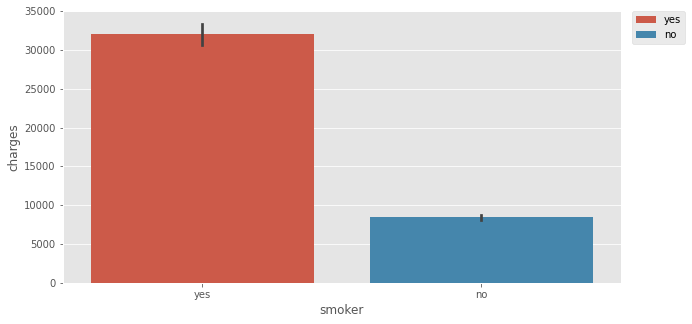

In [12]:

# bar chart for non-smoker vs smoker
#https://www.statology.org/seaborn-legend-position/
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(data=df, x='smoker', y="charges", hue='smoker', dodge=False, ci = 95)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [13]:
# accounting for unequal variances with Welch's T-Test
results = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var = False)
print(results)
print(results.pvalue<.05)

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)
True


**Interpretation of P-Value:** Our p-value is < alpha (0.05), so we reject the null hypothesis that the samples come from populations that do not have equal variances. We did not meet the assumption of equal variance, so I will run the last test (below), which is a Welch's T-Test (i.e, for groups with unequal variances). Based on our statistical testing, smokers are charged significantly more on insurance than non-smokers.

# Q2 Hypothesis Testing

## Null Hypothesis & Alternate Hypothesis
Q2.  Are men more likely to smoke than women?
- H0 (Null Hypothesis): Men smoke the same as women.
- H1 (Alternative Hypothesis): Men smoke significantly more than women.

# Checking for Assumptions of Chi-Square Test

- Assumption #1: My two variables are measured categorically. Target (smoker/non-smoker) and Male/Female
- The outcomes are independent

In [14]:
# displaying features
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Visualizing the Groups

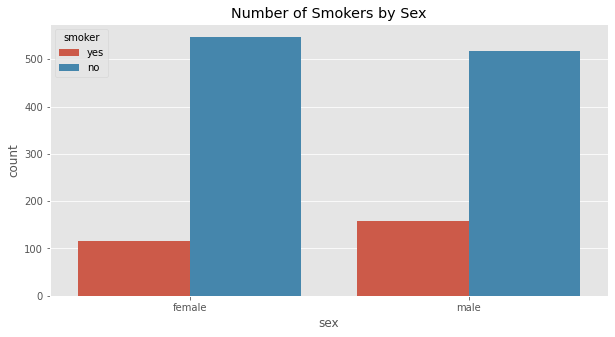

In [15]:
# viz
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

## Enable Chi-Squared Test with Contingency Table

In [16]:
# calculating the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [17]:
# runnning the test and saving the output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [18]:
# p-value eval
print(p)
p<.05

0.006548143503580696


True

**Interpretation:** Since our p < .05, we reject the null hypothesis. This means that we accept the alternate hypothesis and conclude that there is a relationship between a sex and smoking status, which means men are more likely to smoke than women based on the dataset provided.

# Q3 Hypothesis Testing

## Null Hypothesis & Alternate Hypothesis
Q3.   Do different regions have different charges, on average?
- H0 (Null Hypothesis): Regions have the same average charges.
- H1 (Alternative Hypothesis): Regions have significantly different average charges.

Determining the Correct Test:
  - Type of Data? Numeric
  - How many groups/samples? more than 2
  - Therefore, we will use ANOVA

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


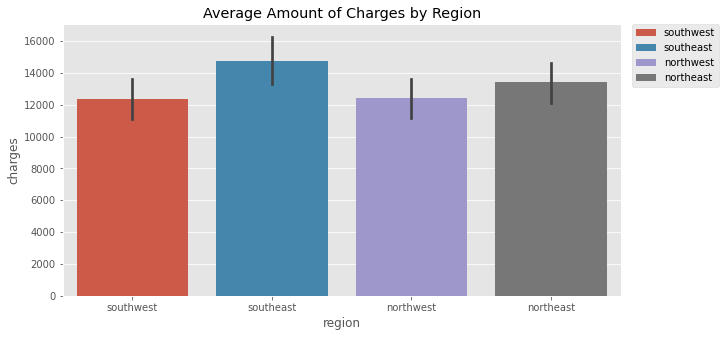

In [20]:
# viz
# set the style
plt.style.use('ggplot')

# set the size
fig, ax = plt.subplots(figsize=(10,5))

ax = sns.barplot(data=df, x='region', y='charges',hue='region',dodge=False, ci=95)
ax.set_title("Average Amount of Charges by Region");

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [21]:
# creating groups dictionary. There are 4 groups
groups = {}

## looping through all unique categories
for i in df['region'].unique():
    
    ## getting series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # saving into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [22]:
# running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    
    ## saving the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [23]:
# checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


## Testing Assumption of Equal Variance

In [24]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

## One-way ANOVA

In [25]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)

> Single P-value represents the difference between all groups. We know there is a significant difference but we can use pairwise to compare between every group against one another to see which one was truly significant.

## Tukey's Pairwise Multiple Comparison test

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## saving the values as charges and the labels to the region
values = df['charges']
labels = df['region']

In [27]:
## performing tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


**Interpretation:** We see that there is only a significant difference between southeast and southwest for amount charged. All the other regions follow our failure to reject the null hypothesis, with only southeast vs. southwest rejecting the null hypothesis. It shows that southeast charges $2,388 (on average) significantly more than southwest.